In [1]:
# Author: Brent Artuch
# 2024/09/26

from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.circuitplot import circuit_plot
from sympy.physics.quantum.qubit import * # Package allows for easy quibit creation
from sympy.physics.quantum.gate import * # easy gate reference
import numpy as np

# Qiskit libraries
from qiskit.quantum_info import Operator, Statevector
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram, plot_bloch_vector

init_printing()

## Classical Boolean Logic
<p style="text-align: center">AND Gate</p>
\begin{array}{|c c|c|}
x_0 & x_1 & x_0 \land x_1\\ 
\hline % Put a horizontal line between the table header and the rest.
0 & 0 & 0\\
0 & 1 & 0\\
1 & 0 & 0\\
1 & 1 & 1\\
\end{array}

<p style="text-align: center">OR Gate</p>
\begin{array}{|c c|c|}
x_0 & x_1 & x_0 \lor x_1\\ 
\hline % Put a horizontal line between the table header and the rest.
0 & 0 & 0\\
0 & 1 & 1\\
1 & 0 & 1\\
1 & 1 & 1\\
\end{array}

<p style="text-align: center">NAND Gate</p>
\begin{array}{|c c|c|}
x_0 & x_1 & \neg (x_0 \land x_1)\\ 
\hline % Put a horizontal line between the table header and the rest.
0 & 0 & 1\\
0 & 1 & 1\\
1 & 0 & 1\\
1 & 1 & 0\\
\end{array}

<p style="text-align: center">NOT Gate</p>
\begin{array}{|c|c|}
x_0 & \neg x_0\\ 
\hline % Put a horizontal line between the table header and the rest.
0 & 1\\
1 & 0\\
\end{array}

Quantum gates must be reversable such that $UU^\dagger$ = $U^\dagger U$ = $I$. Thus, for each output state there is a unique input state. <br>
Of the given classical gates, the not gate is the only one that is reversable, therefore we can represent it as a matrix that we will label $X$. <br>
$X\ket{\psi}$ = $\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$ = $\begin{bmatrix} c_0 \\ c_1 \end{bmatrix}$ = $\begin{bmatrix} c_1 \\ c_0 \end{bmatrix}$ <br>
$X\ket{\psi}$ = $X(c_0\ket{0}+c_1\ket{1})$ = $c_0\ket{1}+c_1\ket{0}$

In [2]:
# define X
b = symbols("b")
X = Matrix([[0, 1], [1, 0]])
ket_b = Matrix([[b], [1-b]])

# Apply X gate to the state vector
X_on_ket_b = X * ket_b

# Apply X gate twice
XX_on_ket_b = X * (X_on_ket_b)
# Notice this flips the state back to its original value (identity), thus X is unitary.
(X, ket_b, X_on_ket_b, XX_on_ket_b)

⎛⎡0  1⎤  ⎡  b  ⎤  ⎡1 - b⎤  ⎡  b  ⎤⎞
⎜⎢    ⎥, ⎢     ⎥, ⎢     ⎥, ⎢     ⎥⎟
⎝⎣1  0⎦  ⎣1 - b⎦  ⎣  b  ⎦  ⎣1 - b⎦⎠

## Controlled Not Gate
$\ket{a,b} \rightarrow \ket{a, a \ \oplus \ b}$<br>
$
CX\ket{\psi}=
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\ 
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 
\end{bmatrix}
\begin{bmatrix}
c_0 \\ c_1 \\ c_2 \\ c_3 
\end{bmatrix} =
\begin{bmatrix}
c_0 \\ c_1 \\ c_3 \\ c_2 
\end{bmatrix}
$

In [3]:
# Define states
a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")

# Initialize circuit based on states
circuit = QuantumCircuit(a,b)

# Apply CNOT gate
circuit.cx(0, 1)

display(circuit.draw())

a: ──■──
   ┌─┴─┐
b: ┤ X ├
   └───┘

In [4]:
c_0, c_1, c_2, c_3 = symbols("c_0, c_1, c_2, c_3")
ket_psi = Matrix([[c_0], [c_1], [c_2], [c_3]])

# Define CX/CNOT matrix
CX = Matrix([
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0]])
# apply to ket psi to swap the elements of the bottom right quadrant
CX_on_ket_psi = CX * ket_psi

(ket_psi, CX_on_ket_psi)

⎛⎡c₀⎤  ⎡c₀⎤⎞
⎜⎢  ⎥  ⎢  ⎥⎟
⎜⎢c₁⎥  ⎢c₁⎥⎟
⎜⎢  ⎥, ⎢  ⎥⎟
⎜⎢c₂⎥  ⎢c₃⎥⎟
⎜⎢  ⎥  ⎢  ⎥⎟
⎝⎣c₃⎦  ⎣c₂⎦⎠

In [5]:
# Define the common states
qubits = (Matrix([[1], [0]]), Matrix([[0], [1]]), Matrix([[c_0], [c_1]]))

# 1-Qubit
ket_0 = qubits[0]
ket_1 = qubits[1]
ket_plus = 1/sqrt(2)*(ket_0 + ket_1)
ket_minus = 1/sqrt(2)*(ket_0 - ket_1)
ket_i = 1/sqrt(2)*(ket_0 + I*ket_1)
ket_minus_i = 1/sqrt(2)*(ket_0 - I*ket_1)
# 2-Qubit
ket_00 = TensorProduct(ket_0, ket_0)
ket_01 = TensorProduct(ket_0, ket_1)
ket_10 = TensorProduct(ket_1, ket_0)
ket_11 = TensorProduct(ket_1, ket_1)

# Example of CNOT application
ket_plus_0 = TensorProduct(ket_plus, ket_0)
# We get |00> and |10>
CX_on_ket_plus_0 = CX * ket_plus_0
# Notice the resulting flip giving us |00> and |11>
(ket_plus, ket_0, ket_plus_0, CX_on_ket_plus_0)

⎛           ⎡√2⎤  ⎡√2⎤⎞
⎜           ⎢──⎥  ⎢──⎥⎟
⎜⎡√2⎤       ⎢2 ⎥  ⎢2 ⎥⎟
⎜⎢──⎥       ⎢  ⎥  ⎢  ⎥⎟
⎜⎢2 ⎥  ⎡1⎤  ⎢0 ⎥  ⎢0 ⎥⎟
⎜⎢  ⎥, ⎢ ⎥, ⎢  ⎥, ⎢  ⎥⎟
⎜⎢√2⎥  ⎣0⎦  ⎢√2⎥  ⎢0 ⎥⎟
⎜⎢──⎥       ⎢──⎥  ⎢  ⎥⎟
⎜⎣2 ⎦       ⎢2 ⎥  ⎢√2⎥⎟
⎜           ⎢  ⎥  ⎢──⎥⎟
⎝           ⎣0 ⎦  ⎣2 ⎦⎠

In [6]:
# Example 2
ket_plus_minus = TensorProduct(ket_plus, ket_minus)
CX_on_ket_plus_minus = CX * ket_plus_minus
# Note the resulting flip in rows 3 and 4
(ket_plus, ket_minus, ket_plus_minus, CX_on_ket_plus_minus)

⎛⎡√2⎤  ⎡ √2 ⎤  ⎡1/2 ⎤  ⎡1/2 ⎤⎞
⎜⎢──⎥  ⎢ ── ⎥  ⎢    ⎥  ⎢    ⎥⎟
⎜⎢2 ⎥  ⎢ 2  ⎥  ⎢-1/2⎥  ⎢-1/2⎥⎟
⎜⎢  ⎥, ⎢    ⎥, ⎢    ⎥, ⎢    ⎥⎟
⎜⎢√2⎥  ⎢-√2 ⎥  ⎢1/2 ⎥  ⎢-1/2⎥⎟
⎜⎢──⎥  ⎢────⎥  ⎢    ⎥  ⎢    ⎥⎟
⎝⎣2 ⎦  ⎣ 2  ⎦  ⎣-1/2⎦  ⎣1/2 ⎦⎠

## Circuit Diagrams

In [7]:
# Define basic Gate operators with qiskit
X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

display(X.draw("latex"))
display(Y.draw("latex"))
display(Z.draw("latex"))
display(H.draw("latex"))
display(S.draw("latex"))
display(T.draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [8]:
# Initialize circuit
circuit = QuantumCircuit(1)

# Add gates to the circuit
circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

## No-Cloning Theorem
Try to copy a quibit in an unknown state:
$\ket{\psi}$ = $\alpha\ket{0}+\beta\ket{1}$<br>
We need to find a Quantum Gate $U$ that allows us to copy or clone a general unknown quibit. <br>
Furthermore, $U\ket{\psi}\ket{0}$ = $\ket{\psi}\ket{\psi}$ <br>
This means that $U\begin{bmatrix} \alpha \\ \beta \end{bmatrix}\otimes\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ = $\begin{bmatrix} \alpha \\ \beta \end{bmatrix}\otimes\begin{bmatrix} \alpha \\ \beta \end{bmatrix}$<br>
$U\begin{bmatrix} \alpha \\ 0 \\ \beta \\ 0\end{bmatrix}$ = $\begin{bmatrix} \alpha^2 \\ \alpha\beta \\ \alpha\beta \\ \beta^2 \end{bmatrix}\rightarrow\begin{bmatrix} U\alpha \\ 0 \\ U\beta \\ 0\end{bmatrix}$ = $\begin{bmatrix} \alpha^2 \\ \alpha\beta \\ \alpha\beta \\ \beta^2 \end{bmatrix}$<br>
To solve this we need to know $\alpha$ and $\beta$ which we do not. Thus we cannot clone a qubit.
Additionally, $U\ket{\psi}\ket{0}$ = $\ket{\psi}\ket{\psi}$ is a non-linear operation which violates the linear nature of quantum mechanics.

## Quantum Logic Gates
Toffoli Gate: $\ket{abc} \rightarrow \ket{ab \oplus c}$ <br>
This is a three-qubit operation that flips the right qubit if the left and middle qubits are both 1.

In [9]:
circuit = QuantumCircuit(3)
# Apply Toffoli gate
circuit.ccx(0, 1, 2)

display(circuit.draw())

q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘

## Preparing a state in Superposition
We put states into superpostition by applying the Hadamard Gate. <br>
Hadamard Gate: $H=\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$ <br>
$H \begin{bmatrix} c_0 \\ c_1 \end{bmatrix}$ = $\frac{1}{\sqrt{2}}\begin{bmatrix} c_0 + c_1 \\ c_0 - c_1 \end{bmatrix}$

In [10]:
ket_zero = Statevector([1, 0]) 
ket_one = Statevector([0, 1]) 
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])

ket_plus = ket_zero.evolve(H)
ket_minus = ket_one.evolve(H)

display(ket_plus.draw("latex"))
display(ket_minus.draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Changing the Phase
$Z=\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$, $Z(\alpha\ket{0}+\beta\ket{1})$ = $\alpha\ket{0}-\beta\ket{1}$<br>
$S=\begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix}$, $S(\alpha\ket{0}+\beta\ket{1})$ = $\alpha\ket{0}+i\beta\ket{1}$<br>
$Y=\begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}$, $Y(\alpha\ket{0}+\beta\ket{1})$ = $-i\beta\ket{0}+i\alpha\ket{1}$

In [11]:
# Example Z, S, Y
Z = Operator([[1, 0], [0, -1]])
S = Operator([[1, 0], [0, 1.0j]])
Y = Operator([[0, -1.0j], [1.0j, 0]])

negative_ket_one = ket_one.evolve(Z)
i_ket_one = ket_one.evolve(S)
negative_i_ket_zero = ket_one.evolve(Y)

display(negative_ket_one.draw("latex"))
display(i_ket_one.draw("latex"))
display(negative_i_ket_zero.draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## The Bloch Sphere
Since $|c_0|^2+|c_1|^2$ = $1$,<br>
$q$ = $e^{i\gamma}(\cos(\frac{\theta}{2})\ket{0})+e^{i\varphi}(\sin(\frac{\theta}{2})\ket{1})$

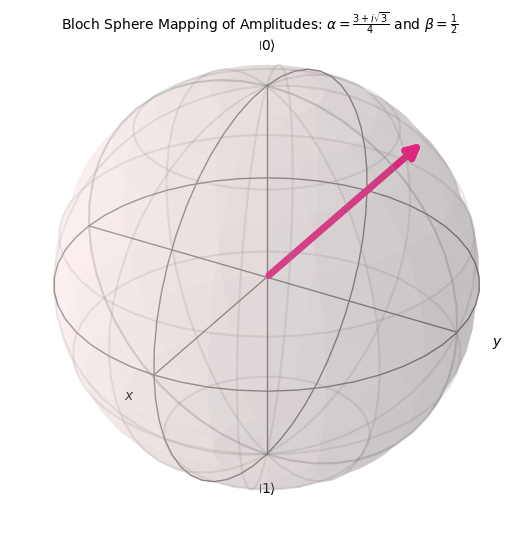

In [12]:
# Function to extract spherical coordinates from a given state
alpha = complex((3/4), sqrt(3)/4)
beta = 1/2
# ST alpha and beta are amplitudes of ket 0 and ket 1 respectivley

r_alpha = np.sqrt((3/4)**2 + (np.sqrt(3)/4)**2) 
phi_alpha = np.atan((np.sqrt(3)/4)/(3/4)) # pi/6

phi = np.pi - phi_alpha # 5pi/6
theta = 2*np.asin(1/2) # pi/3

x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)
plot_bloch_vector([x,y,z], title=r'Bloch Sphere Mapping of Amplitudes: $\alpha=\frac{3+i\sqrt{3}}{4}$ and $\beta=\frac{1}{2}$')

## General Single-Qubit Unitary Gate
Can be written as: $U$ = $e^{i\gamma}V$ <br>
$V = \begin{bmatrix} \alpha & -\beta^* \\ \beta & -\alpha^* \end{bmatrix}$ ST $|\alpha|^2+|\beta|^2$ = $1$

## Rotation Gates
$T = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{bmatrix}$ <br>
The $S$ and $Z$ gates can also be converted to rotation gates as shown:<br>
$S = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\pi} \end{bmatrix}$, &emsp;
$Z = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\pi/2} \end{bmatrix}$ ST $e^{i\pi}=-1$ and $e^{i\pi/2}=i$<br>
Other properties of rotation gates: $T^2=S$, $S^2=Z$, and $T^4=Z$

## Tensor Products of Quantum Gates (w Qiskit)

In [13]:
# Symbolic Tensor Product of Matrices
a,b,c,d,e,f,g,h = symbols("a,b,c,d,e,f,g,h")
A = Matrix([[a,b], [c,d]])
B = Matrix([[e,f], [g,h]])
AB = TensorProduct(A, B)
(A,B,AB)

⎛                ⎡a⋅e  a⋅f  b⋅e  b⋅f⎤⎞
⎜                ⎢                  ⎥⎟
⎜⎡a  b⎤  ⎡e  f⎤  ⎢a⋅g  a⋅h  b⋅g  b⋅h⎥⎟
⎜⎢    ⎥, ⎢    ⎥, ⎢                  ⎥⎟
⎜⎣c  d⎦  ⎣g  h⎦  ⎢c⋅e  c⋅f  d⋅e  d⋅f⎥⎟
⎜                ⎢                  ⎥⎟
⎝                ⎣c⋅g  c⋅h  d⋅g  d⋅h⎦⎠

In [14]:
# Declare sample operators/gates
X = Operator([[0, 1], [1, 0]])
I = Operator([[1, 0], [0, 1]])

# Simple tensor call
X.tensor(I).draw("latex")

<IPython.core.display.Latex object>